### Function to find Top 5 tags for given restaurant df

In [16]:
import pandas as pd
import numpy as np
import json
import requests
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso
import statsmodels.api as sm
import seaborn as sns
plt.style.use('seaborn')

In [17]:
italian = pd.read_pickle("./italian_551.pkl")

In [18]:
# Get Top 5 "DO HAVE" tags and 'DO NOT HAVE' tags for Italian Restaurants 
def do_tag(df):
    df = df.reset_index(drop=True)
    #----------------------------------------------------
    # Extract all category tags for italian restaurants
    def get_cat(df):
        N = len(df)
        italian_cat = []
        for i in range(N):
            italian_cat.extend(df.categories[i])
        italian_cat_set = set(italian_cat)
        return italian_cat_set
    
    #----------------------------------------------------
    # Make each tag a column and add to df
    italian_cat_set = get_cat(df)
    italian_cat_set.remove('italian')
    for i in italian_cat_set:
        df[str(i)]=[(str(i) in df.categories[j])*1 for j in range(len(df))]
    
    #----------------------------------------------------
    # Create a new df only with all categories
    index = list(df.index.unique().values)
    columns = list(italian_cat_set)
    df_new = pd.DataFrame(index=index, columns=columns)
    
    # Add tag columns to df_new to fit linear model
    df_new['rating'] = df['rating']
    for i in italian_cat_set:    
        df_new[str(i)]=df[str(i)]
          
    #----------------------------------------------------
    # Apply Linear Regression to df_new to get most effective tags
    Y = df_new['rating']
    X = df_new[columns]
    model = LinearRegression().fit(X,Y)
    intercept = model.intercept_
    coef = model.coef_
    # Find top 5 tags
    d = list(zip(coef,columns))
    do_not_tag = sorted(d)[:5]
    do_tag = sorted(d)[-5:]
    do_tag_cat = [tag[1] for tag in do_tag]
    do_not_tag_cat = [tag[1] for tag in do_not_tag]
    
#     print(italian_cat_set)
#     print('Do Tag: ',do_tag_cat)
#     print('Do Not Tag: ',do_not_tag_cat)
    return do_tag_cat, do_not_tag_cat

In [19]:
do_tag(italian)

(['vegan', 'vegetarian', 'popupshops', 'piadina', 'foodstands'],
 ['hookah_bars', 'mexican', 'modern_european', 'dimsum', 'comfortfood'])

### Service Type Needed

In [109]:
# Analysis on Service Type
def service(df):
    df = df.reset_index(drop=True)
    #----------------------------------------------------
    # Create a new df only with all categories
    index = list(df.index.unique().values)
    columns = ['pickup','delivery','restaurant_reservation']
    df_service = pd.DataFrame(index=index, columns=columns)
    
    # Add tag columns to df_new to fit linear model
    df_service['rating'] = df['rating']
    for i in columns:    
        df_service[str(i)]=df[str(i)]*1
    
    #--------------------------------------------------------------------------
    # Apply Linear Regression on Service Types to find how significant they are
    Y = df_service['rating']
    X = df_service[columns]
    X = sm.add_constant(X)
    model = sm.OLS(Y,X)
    result = model.fit()
    parameter = result.params[1:]
    pvalue = result.pvalues[1:]
    
    # Store model outputs for service types
    service_dict = {}
    for i in range(len(columns)):
        if parameter[i]>0:
            service_dict[columns[i]] = parameter[i]
    service_dict
    
    # Record pvalues for later use
    pvalue_dict={}
    for i in range(len(columns)):
        pvalue_dict[columns[i]+'_p_value'] = pvalue[i]
    pvalue_dict
    
#     print('Significance of Service Types:', service_dict)
#     print('P-value of Service Types:', pvalue_dict)
    return service_dict, pvalue_dict

In [110]:
service(italian)

({'restaurant_reservation': 0.09642223116162063},
 {'pickup_p_value': 0.5955120038039738,
  'delivery_p_value': 0.9929829268757393,
  'restaurant_reservation_p_value': 0.12681629626276475})

### Average Price Level

In [85]:
def avg_price(df):
    df = df.reset_index(drop=True)
    avg_price = np.mean(df['price_num'])
    return avg_price

In [86]:
avg_price(cluster0)

2.147874015748031

### Average Price Level

In [87]:
def avg_rate(df):
    df = df.reset_index(drop=True)
    avg_rate = np.mean(df['avg_rate'])
    return avg_rate

In [88]:
avg_rate(cluster0)

3.9252494979863424

In [20]:
italian = pd.read_pickle("./italian_review_551.pkl")

### Price Level Difference Between Clusters

In [92]:
#127 resturants from cluster1
cluster0 = italian[italian['label']==0]
#104 resturants from cluster1
cluster1 = italian[italian['label']==1]
# 130 restaurants from cluster4
cluster2 = italian[italian['label']==2]
# 173 restaurants from cluster2
cluster3 = italian[italian['label']==3]
# 16 restaurants from cluster4
cluster4 = italian[italian['label']==4]

In [93]:
# Per cluster average price level difference
print('Average price level:', np.mean(cluster0['price_num']))
print('Average price level:', np.mean(cluster1['price_num']))
print('Average price level:', np.mean(cluster2['price_num']))
print('Average price level:', np.mean(cluster3['price_num']))
print('Average price level:', np.mean(cluster4['price_num']))

Average price level: 2.147874015748031
Average price level: 2.1913461538461534
Average price level: 2.437692307692308
Average price level: 2.1941379310344833
Average price level: 1.8687500000000001


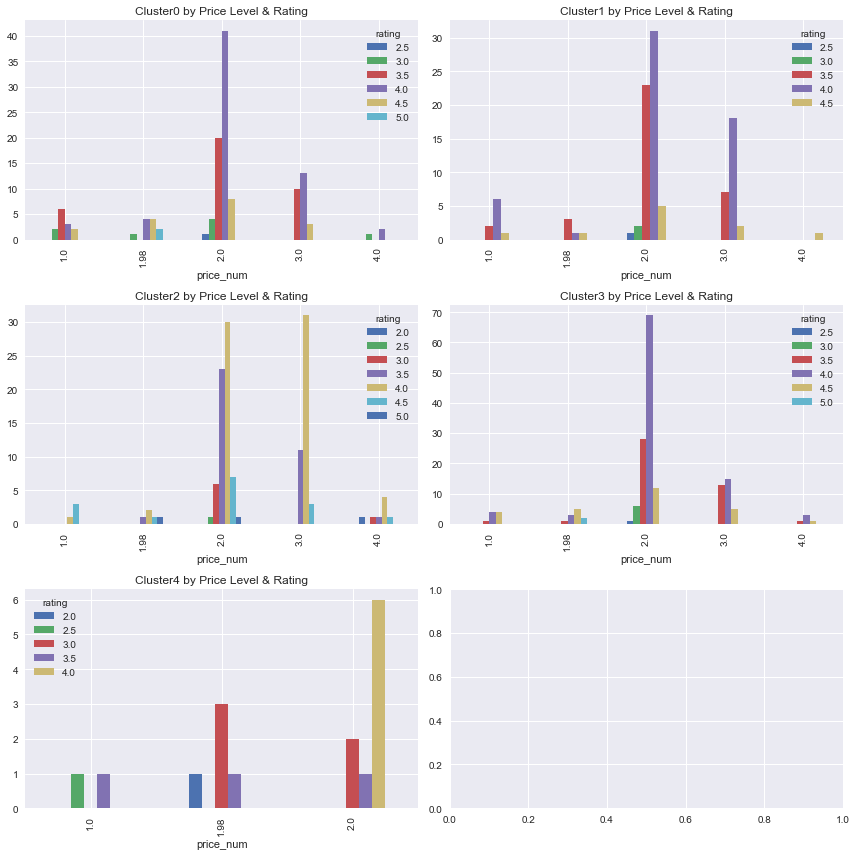

In [94]:
# import matplotlib.pyplot as plt
# %matplotlib inline
df_list = [cluster0,cluster1,cluster2,cluster3,cluster4]
COL_NUM = 2
ROW_NUM = 3
fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(12,12))

for i,df in enumerate(df_list):
    ax = axes[int(i/COL_NUM), i%COL_NUM]
    df.groupby(['price_num','rating']).size().unstack().plot(kind='bar',ax=ax,title=f"Cluster{i} by Price Level & Rating")

plt.tight_layout() 

In [95]:
## Overall, Price level=2 has the most number of restaurants

# Cluster 4 only has restaurants with price level 1 and 2, also does not have Rating=5
# cluster2 has the largest range of Ratings: 2-5

# Comparing all clusters for Price level=3:
# Cluster2 has the most number of restaurants has Rating=4
# Cluster2 price-level=2 and price-level=3 restaurants have the most similar quality in terms of Rating



In [89]:
# test use, with label for different clusters

In [5]:
italian = italian.reset_index(drop=True)
italian.head()

,alias,categories,coordinates,display_phone,distance,id,image_url,is_closed,location,name,...,price_num,address,zip,latitude,longitude,pickup,delivery,restaurant_reservation,dist_group,italian
0,babbalucci-new-york,[italian],"{'latitude': 40.80894, 'longitude': -73.94496}",(646) 918-6572,531.822111,gyWc5qJRvu26LVQIShdR4Q,https://s3-media1.fl.yelpcdn.com/bphoto/3MOwPG...,False,"{'address1': '331 Lenox Ave', 'address2': '', ...",Babbalucci,...,2.0,"331 Lenox Ave, New York, NY 10027",10027,40.808940,-73.944960,True,True,False,0-1000m,True
1,pisticci-new-york,"[italian, breakfast_brunch]","{'latitude': 40.8141624, 'longitude': -73.960288}",(212) 932-3500,1140.188943,wZkZmjZEJDraLJgAalnHvA,https://s3-media1.fl.yelpcdn.com/bphoto/ERoh_M...,False,"{'address1': '125 La Salle St', 'address2': ''...",Pisticci,...,2.0,"125 La Salle St, New York, NY 10027",10027,40.814162,-73.960288,True,True,True,1000-2000m,True
2,vinatería-new-york-4,"[italian, spanish, seafood]","{'latitude': 40.8064392068585, 'longitude': -7...",(212) 662-8462,999.363229,MH08_pIRKsUSwfkVYxUE7w,https://s3-media2.fl.yelpcdn.com/bphoto/ZuDNNI...,False,"{'address1': '2211 Frederick Douglass Blvd', '...",VINATERÍA,...,2.0,"2211 Frederick Douglass Blvd, New York, NY 10026",10026,40.806439,-73.954011,False,False,False,0-1000m,True
3,sottocasa-pizzeria-harlem-new-york,"[pizza, italian]","{'latitude': 40.805587, 'longitude': -73.947547}",(646) 928-4870,888.573617,NPnWsPxOpG91GHx74S27Uw,https://s3-media1.fl.yelpcdn.com/bphoto/jttl7I...,False,"{'address1': '227 Lenox Ave', 'address2': '', ...",Sottocasa Pizzeria - Harlem,...,2.0,"227 Lenox Ave, New York, NY 10027",10027,40.805587,-73.947547,False,False,False,0-1000m,True
4,grazie-new-york-3,[italian],"{'latitude': 40.77948, 'longitude': -73.9601}",(212) 717-4407,3951.457366,_3QRn51W3IoqBzc9fYet4Q,https://s3-media1.fl.yelpcdn.com/bphoto/IIbqHx...,False,"{'address1': '26 E 84th St', 'address2': '', '...",Grazie,...,2.0,"26 E 84th St, New York, NY 10028",10028,40.779480,-73.960100,True,True,True,3000-4000m,True


### Rating Difference between Clusters

In [96]:
# Per Cluster Average Rating from Yelp
print('Average rating:', np.mean(cluster0['rating']))
print('Average rating:', np.mean(cluster1['rating']))
print('Average rating:', np.mean(cluster2['rating']))
print('Average rating:', np.mean(cluster3['rating']))
print('Average rating:', np.mean(cluster4['rating']))

Average rating: 3.8661417322834644
Average rating: 3.8461538461538463
Average rating: 3.853846153846154
Average rating: 3.9195402298850577
Average rating: 3.375


In [97]:
# Per Cluster Average Rating Looking at Authentic Users ONLY
print('Average adj rating:', np.mean(cluster0['avg_rate']))
print('Average adj rating:', np.mean(cluster1['avg_rate']))
print('Average adj rating:', np.mean(cluster2['avg_rate']))
print('Average adj rating:', np.mean(cluster3['avg_rate']))
print('Average adj rating:', np.mean(cluster4['avg_rate']))

Average adj rating: 3.9252494979863424
Average adj rating: 3.9022315961618865
Average adj rating: 3.9061028531253097
Average adj rating: 3.988659867514029
Average adj rating: 3.5076130010938495


In [7]:
# Create a new df only with all categories
index = list(italian.index.unique().values)
columns = ['pickup','delivery','restaurant_reservation']
df_service = pd.DataFrame(index=index, columns=columns)
for i in columns:
    print(i)

pickup
delivery
restaurant_reservation


In [8]:
df_service['rating'] = italian['rating']
for i in columns:    
    df_service[str(i)]=italian[str(i)]*1

In [9]:
df_service.head()

,pickup,delivery,restaurant_reservation,rating
0,1,1,0,4.0
1,1,1,1,4.0
2,0,0,0,4.0
3,0,0,0,4.5
4,1,1,1,4.0


In [10]:
Y = df_service['rating']
X = df_service[columns]

In [15]:
X

,pickup,delivery,restaurant_reservation
0,1,1,0
1,1,1,1
2,0,0,0
3,0,0,0
4,1,1,1
5,1,1,0
6,1,1,0
7,1,1,0
8,0,0,0
9,0,0,0


In [14]:
np.array(X)

array([[1, 1, 0],
       [1, 1, 1],
       [0, 0, 0],
       ...,
       [1, 1, 0],
       [1, 1, 0],
       [1, 1, 0]])

In [102]:
## Use sklearn package

In [103]:
#Apply Linear Regression to all categories
model = LinearRegression().fit(X,Y)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [104]:
coef = model.coef_
coef

array([-0.06636034, -0.00108665,  0.09642223])

In [32]:
df = italian.reset_index(drop=True)
#----------------------------------------------------
# Extract all category tags for italian restaurants
def get_cat(df):
    N = len(df)
    italian_cat = []
    for i in range(N):
        italian_cat.extend(df.categories[i])
    italian_cat_set = set(italian_cat)
    return italian_cat_set

#----------------------------------------------------
# Make each tag a column and add to df
italian_cat_set = get_cat(df)
italian_cat_set.remove('italian')
for i in italian_cat_set:
    df[str(i)]=[(str(i) in df.categories[j])*1 for j in range(len(df))]

# Create a new df only with all categories
index = list(df.index.unique().values)
columns = list(italian_cat_set)
df_new = pd.DataFrame(index=index, columns=columns)

# Add tag columns to df_new to fit linear model
df_new['rating'] = df['rating']
for i in italian_cat_set:    
    df_new[str(i)]=df[str(i)]

In [ ]:
df_new['price_num'] = df['price_num']
df_new['pickup'] = df_new['pickup']
df_new['delivery'] = df_new['delivery']
df_new['restaurant_reservation'] = df_new['restaurant_reservation']



In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551 entries, 0 to 550
Data columns (total 84 columns):
alias                     551 non-null object
categories                551 non-null object
coordinates               551 non-null object
display_phone             551 non-null object
distance                  551 non-null float64
id                        551 non-null object
image_url                 551 non-null object
is_closed                 551 non-null bool
location                  551 non-null object
name                      551 non-null object
phone                     551 non-null object
price                     514 non-null object
rating                    551 non-null float64
review_count              551 non-null int64
transactions              551 non-null object
url                       551 non-null object
price_num                 551 non-null float64
address                   551 non-null object
zip                       551 non-null object
latitude             

In [ ]:
column_tree = ['']

In [36]:
Y = df_new['rating']
X = df_new[columns]

In [28]:
from sklearn import tree

In [43]:
clf = tree.DecisionTreeRegressor(max_depth = 5)
clf = clf.fit(X, Y)

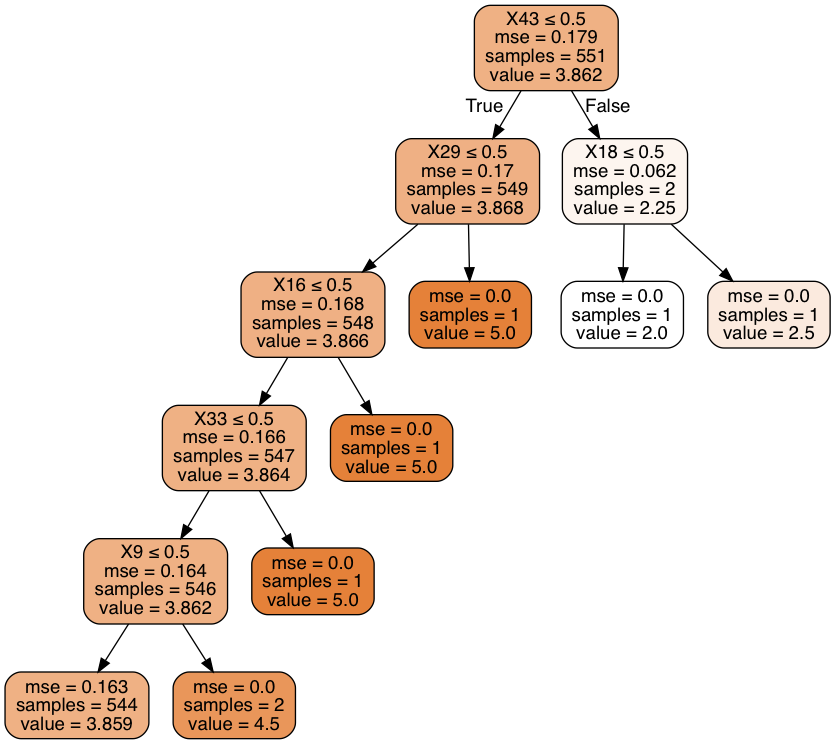

In [44]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())